In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity_='all'

In [11]:
# Load the libraries

import warnings
warnings.filterwarnings('ignore') # to ignore warnings


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math



In [12]:
#magic commands to get plotting within jypyter notebook

%matplotlib inline

In [14]:
#viz theme

sns.set_style(style='darkgrid')
plt.style.use('ggplot')

In [17]:
data = pd.read_csv(r"C:\Users\CR GAYATHRI\Desktop\MachineLearning\Amaresh sir\Linear_Regression\Crude_Indigo_1.csv")

In [18]:
data.head()

,Crude,Indigo
0,74.96,724.45
1,73.17,744.45
2,70.97,760.80
3,71.78,808.55
4,72.11,822.30


In [19]:
data.tail()

,Crude,Indigo
48,48.17,1151.45
49,47.12,1152.05
50,45.59,1154.45
51,42.53,1161.40
52,46.22,1156.25


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
Crude     53 non-null float64
Indigo    53 non-null float64
dtypes: float64(2)
memory usage: 976.0 bytes


In [21]:
data.columns

Index(['Crude', 'Indigo'], dtype='object')

In [22]:
data.cov()

,Crude,Indigo
Crude,73.919548,-917.805616
Indigo,-917.805616,12690.404109


In [23]:
data.corr()

,Crude,Indigo
Crude,1.000000,-0.947618
Indigo,-0.947618,1.000000


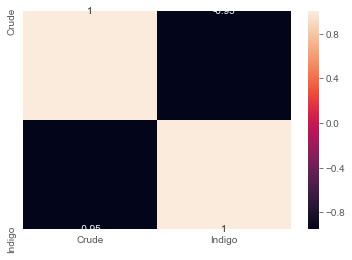

In [24]:
sns.heatmap(data=data.corr(),annot= True)

In [25]:
datacorr = data.corr()
datacorr.style.background_gradient(cmap = 'Accent')

,Crude,Indigo
Crude,1,-0.947618
Indigo,-0.947618,1


In [26]:
sns.__version__

'0.9.0'

In [27]:
import matplotlib
matplotlib.__version__

'3.1.1'

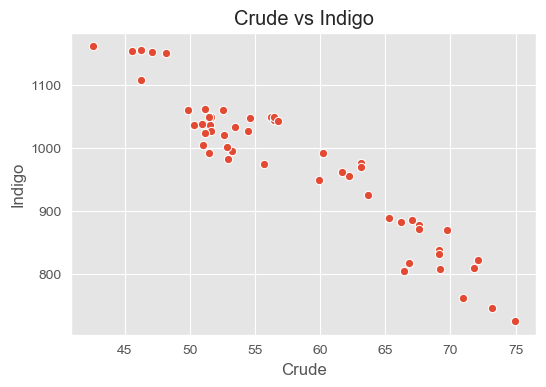

In [28]:
plt.figure(dpi = 100)
#plt.figure(figsize = (10,10))
sns.scatterplot(x=data.Crude, y = data.Indigo)
plt.title('Crude vs Indigo')
plt.show();

## Stats model

In [29]:
import statsmodels.api as sm

In [30]:
# Iv and Dv

X = data.Crude
Y = data.Indigo

In [31]:
X = sm.add_constant(X)

In [32]:
X.head()

,const,Crude
0,1.0,74.96
1,1.0,73.17
2,1.0,70.97
3,1.0,71.78
4,1.0,72.11


In [33]:
Y.head()

0    724.45
1    744.45
2    760.80
3    808.55
4    822.30
Name: Indigo, dtype: float64

In [34]:
model1 = sm.OLS(Y,X)

In [35]:
modelfit = model1.fit()

In [36]:
print(modelfit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Indigo   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     448.9
Date:                Wed, 13 May 2020   Prob (F-statistic):           6.17e-27
Time:                        16:40:58   Log-Likelihood:                -264.60
No. Observations:                  53   AIC:                             533.2
Df Residuals:                      51   BIC:                             537.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1695.8076     34.502     49.151      0.0

In [37]:
modelfit.params

const    1695.807605
Crude     -12.416277
dtype: float64

In [38]:
modelfit.fittedvalues

0      765.083452
1      787.308589
2      814.624399
3      804.567215
4      800.469843
5      829.772258
6      837.594512
7      837.594512
8      836.973699
9      870.994299
10     866.151950
11     856.591417
12     856.591417
13     863.420369
14     874.098368
15     884.900529
16     905.014899
17     911.843851
18     912.340502
19     923.390989
20     930.095779
21     948.471869
22     951.700102
23    1004.345118
24     997.392002
25     994.784584
26     994.784584
27     991.059701
28    1032.405905
29    1017.506372
30    1019.865464
31    1054.755204
32    1055.624343
33    1071.393016
34    1056.990134
35    1063.446598
36    1038.365718
37    1034.640834
38    1039.110694
39    1056.493483
40    1042.587252
41    1062.577459
42    1054.506878
43    1060.715017
44    1042.959740
45    1060.094203
46    1076.483689
47    1121.678939
48    1097.715524
49    1110.752615
50    1129.749519
51    1167.743328
52    1121.927264
dtype: float64

In [39]:
modelfit.resid.sum().round(2)

-0.0

In [40]:
np.round(modelfit.resid.sum(),2)

-0.0

## Scikit learn

In [41]:
# ivs and dvs

X = data.Crude.values.reshape(-1,1)
Y = data.Indigo

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [43]:
model = LinearRegression()

In [44]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
model.coef_

array([-12.41627738])

In [46]:
model.intercept_

1695.8076051212292

In [47]:
modelfit = model.predict(X)

In [48]:
model.predict(40)

ValueError: Expected 2D array, got scalar array instead:
array=40.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [49]:
model.predict(np.array(40).reshape(-1,1))

array([1199.1565098])

In [50]:
model.predict(np.array(35).reshape(-1,1))

array([1261.23789671])

In [51]:
data.Crude.mean()

58.255471698113205

In [52]:
data.Indigo.mean()

972.4915094339626

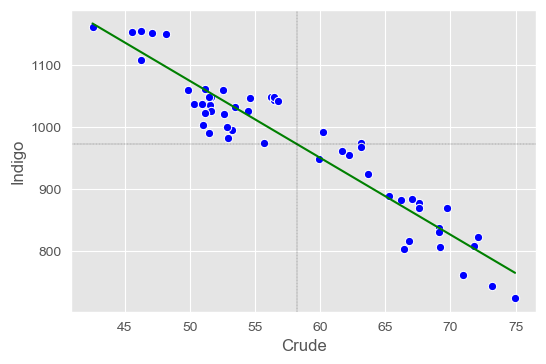

In [53]:
plt.figure(dpi = 100)

sns.scatterplot(x = data.Crude, y = data.Indigo, color= 'blue')
sns.lineplot(x = data.Crude, y = modelfit, color = 'green' )

plt.axvline(data.Crude.mean(), ls = '--', lw = 0.2, color = 'black')
plt.axhline(data.Indigo.mean(), ls = '--', lw = 0.2, color = 'black')

plt.show();

In [54]:
r2_score(data.Indigo,model.predict(X))

0.8979800024743951